In [15]:
import numpy as np  # linear algebra
import pandas as pd  #
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
from datetime import datetime
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

from sklearn.linear_model import LassoCV, RidgeCV, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.kernel_ridge import KernelRidge
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_val_score,KFold
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge,Lasso

READ PREPROCESSED DATA

In [16]:
train = pd.read_csv('preprocessed_train.csv')
test = pd.read_csv('preprocessed_test.csv')
X_train = train.drop(columns="SalePrice")
y_train = train["SalePrice"]

In [25]:
np.argwhere((X_train.columns=='haspool') | (X_train.columns=='PoolArea'))

array([[26],
       [40]], dtype=int64)

### Learning the effects of alpha

<b>1.The evolution of coefficients as alpha is growing</b>

E:\Program\Anaconda\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.31385e-18): result may not be accurate.
  overwrite_a=True).T
E:\Program\Anaconda\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=6.93682e-18): result may not be accurate.
  overwrite_a=True).T
E:\Program\Anaconda\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.77575e-17): result may not be accurate.
  overwrite_a=True).T
E:\Program\Anaconda\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.84105e-17): result may not be accurate.
  overwrite_a=True).T
E:\Program\Anaconda\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=4.54516e-17): result may not be accurate.
  overwrite_a=True).T
E:\Program\Anaconda\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Il

(340,)


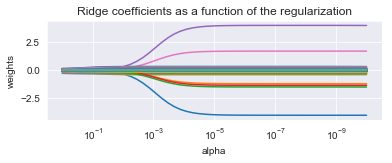

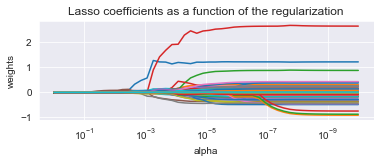

In [19]:
#---------------Ridge Regression-------------
n_alphas = 50
alphas = np.logspace(-10, 0, n_alphas)

coefs = []
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)
print(ridge.coef_.shape)

# #############################################################################
# Display results

ax = plt.subplot(211)

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

# -----------Lasso Regression-------------------
n_alphas = 50
alphas = np.logspace(-10, 0, n_alphas)

coefs = []
for a in alphas:
    lasso = Lasso(alpha=a,max_iter=1e5, fit_intercept=False)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

# #############################################################################
# Display results

ax = plt.subplot(212)

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

<b>2. Changing in testing score as alpha is growing</b>

{'kr__alpha': 0.10204081632653061}

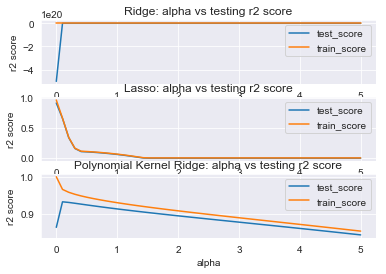

In [25]:
alpha = np.linspace(0,5,50)
ridge = Ridge()
params={"alpha":alpha}
ridge = GridSearchCV(ridge, param_grid=params,scoring="r2",cv=5)
ridge.fit(X_train,y_train)
cvres = ridge.cv_results_
test_score = cvres["mean_test_score"]
train_score = cvres["mean_train_score"]
plt.subplot(311)
plt.plot(alpha,test_score,label="test_score")
plt.plot(alpha,train_score,label="train_score")
plt.legend()
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.title('Ridge: alpha vs testing r2 score')

# LASSO
lasso = Pipeline([
            ('rs',RobustScaler()),
            ('lasso',Lasso(max_iter=1e5))
])
params={"lasso__alpha":alpha}
lasso = GridSearchCV(lasso, param_grid=params,scoring="r2",cv=5)
lasso.fit(X_train,y_train)
cvres = lasso.cv_results_
test_score = cvres["mean_test_score"]
train_score = cvres["mean_train_score"]
plt.subplot(312)
plt.plot(alpha,test_score,label="test_score")
plt.plot(alpha,train_score,label="train_score")
plt.legend()
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.title('Lasso: alpha vs testing r2 score')

# Polynomial
kr_poly = Pipeline([
            ('rs',RobustScaler()),
            ('kr',KernelRidge(kernel="polynomial",degree=2,gamma=0.00202020202020202))
        ])
params={"kr__alpha":alpha}
gs_poly = GridSearchCV(kr_poly, param_grid=params,scoring="r2",cv=5)
gs_poly.fit(X_train,y_train)
cvres = gs_poly.cv_results_
test_score = cvres["mean_test_score"]
train_score = cvres["mean_train_score"]
plt.subplot(313)
plt.plot(alpha,test_score,label="test_score")
plt.plot(alpha,train_score,label="train_score")
plt.legend()
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.title('Polynomial Kernel Ridge: alpha vs testing r2 score')
gs_poly.best_params_

### Top 10 most dominant features

In [17]:
lasso_pipeline = Pipeline([
    ('rs',RobustScaler()),
    ('ls',Lasso(max_iter=1e5,alpha=0.0004378391959798995))
])
lasso_pipeline.fit(X_train,y_train)
lasso = lasso_pipeline.named_steps['ls']
coef = lasso.coef_
top10_id = (-abs(coef)).argsort()[:10]
top10_coef = coef[top10_id]
top10_variables = X_train.columns[top10_id]
pd.DataFrame({'name':top10_variables,'coef':top10_coef})

,name,coef
0,MSZoning_C (all),-0.279489
1,TotalSF,0.106219
2,OverallQual,0.101271
3,Neighborhood_Crawfor,0.094685
4,1stFlrSF,0.081397
5,Neighborhood_StoneBr,0.081234
6,Exterior1st_BrkFace,0.075626
7,GrLivArea,0.073816
8,Functional_Typ,0.067562
9,SaleCondition_Abnorml,-0.066717


In [18]:
ridge = Ridge(alpha=9.115577889447236)
ridge.fit(X_train,y_train)
coef = ridge.coef_
top10_id = (-abs(coef)).argsort()[:10]
top10_coef = coef[top10_id]
top10_variables = X_train.columns[top10_id]
pd.DataFrame({'name':top10_variables,'coef':top10_coef})

,name,coef
0,MSZoning_C (all),-0.129600
1,GrLivArea,0.128500
2,1stFlrSF,0.097761
3,Neighborhood_Crawfor,0.081110
4,Neighborhood_StoneBr,0.072149
5,Functional_Typ,0.065572
6,Exterior1st_BrkFace,0.065253
7,OverallCond,0.058938
8,Functional_Maj2,-0.055940
9,Condition1_RRAe,-0.053108


In [27]:
print(lasso.coef_[[26,40]])
ridge.coef_[[26,40]]

[0.01305305 0.        ]


array([0.01732853, 0.00204813])

### Verify L1 Implicit Feature Selection

Identify Irrelevant Features which have coefficient equal 0 -> Being completely eliminated by L1 during its implicit feature selection

In [3]:
def remove_irrelevant_feats(model,data):
    coef=model.coef_
    irrelevant_feats_idx = np.argwhere(coef == 0).reshape(-1)
    print("Detect {:d} irrelevant features".format(len(irrelevant_feats_idx)))
    return data.drop(columns=data.columns[irrelevant_feats_idx])

We will try to verify if L1 is doing good job by building the Ordinary Least Square (OLS) model on the full dataset, and then remove the irrelevant features suggested by L1 and re-train the OLS model

In [4]:
from sklearn import linear_model
def evaluate_OLS(X,y):
    reg = linear_model.LinearRegression()
    scores = cross_val_score(reg,X,y,scoring="r2",cv=10)
    print("r2 Score: {:.4f}".format(scores.mean()))

In [5]:
evaluate_OLS(X_train,y_train)

r2 Score: -489969428.3181


Remove the irrelevant features identified by L1 and re-train OLS

In [8]:
X_subset = remove_irrelevant_feats(model=lasso,data=X_train)
evaluate_OLS(X_subset,y_train)

Detect 223 irrelevant features
r2 Score: 0.9412


Now let's do one more experiment, we will further apply L1 regression with a hope to find irrelevant features on the subset data and see what will happen

Firstly, we have to search for the best alpha.

Best score 0.9411 given by {'ls__alpha': 9.473684210526316e-05}


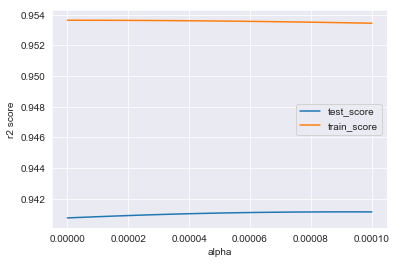

In [11]:
kfolds = KFold(n_splits=10, shuffle=True, random_state=42)
alpha=np.linspace(0,1e-4,20)
lasso_pipeline = Pipeline([
    ('rs',RobustScaler()),
    ('ls',Lasso(max_iter=1e5))
])
params = {"ls__alpha":alpha}
gs_lasso = GridSearchCV(lasso_pipeline, param_grid=params,scoring="r2",cv=kfolds)
gs_lasso.fit(X_subset,y_train)
test_score = gs_lasso.cv_results_["mean_test_score"]
train_score = gs_lasso.cv_results_["mean_train_score"]
plt.plot(alpha,test_score,label="test_score")
plt.plot(alpha,train_score,label="train_score")
plt.legend()
plt.xlabel('alpha')
plt.ylabel('r2 score')
print("Best score {:.4f} given by {best_param}".format(gs_lasso.best_score_,best_param=gs_lasso.best_params_))

Now we can make another round of removing irrelevant features and re-evaluate OLS model

In [12]:
lasso_pipeline = Pipeline([
    ('rs',RobustScaler()),
    ('ls',Lasso(max_iter=1e5,alpha=9.473684210526316e-05))
])
lasso_pipeline.fit(X_subset,y_train)
lasso = lasso_pipeline.named_steps['ls']
X_subset2 = remove_irrelevant_feats(model=lasso,data=X_subset)
evaluate_OLS(X_subset2,y_train)

Detect 2 irrelevant features
r2 Score: 0.9414


The accuracy slightly improves to 94.14%. Can we make further improve by making another round

Best score 0.9412 given by {'ls__alpha': 8.888888888888889e-05}


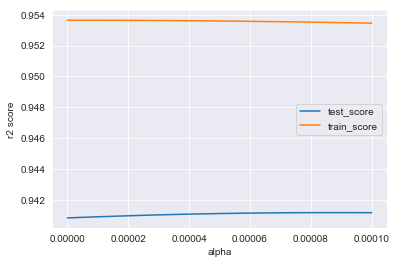

In [13]:
kfolds = KFold(n_splits=10, shuffle=True, random_state=42)
alpha=np.linspace(0,1e-4,100)
lasso_pipeline = Pipeline([
    ('rs',RobustScaler()),
    ('ls',Lasso(max_iter=1e5))
])
params = {"ls__alpha":alpha}
gs_lasso = GridSearchCV(lasso_pipeline, param_grid=params,scoring="r2",cv=kfolds)
gs_lasso.fit(X_subset2,y_train)
test_score = gs_lasso.cv_results_["mean_test_score"]
train_score = gs_lasso.cv_results_["mean_train_score"]
plt.plot(alpha,test_score,label="test_score")
plt.plot(alpha,train_score,label="train_score")
plt.legend()
plt.xlabel('alpha')
plt.ylabel('r2 score')
print("Best score {:.4f} given by {best_param}".format(gs_lasso.best_score_,best_param=gs_lasso.best_params_))

In [14]:
lasso_pipeline = Pipeline([
    ('rs',RobustScaler()),
    ('ls',Lasso(max_iter=1e5,alpha=8.888888888888889e-05))
])
lasso_pipeline.fit(X_subset,y_train)
lasso = lasso_pipeline.named_steps['ls']
X_subset3 = remove_irrelevant_feats(model=lasso,data=X_subset2)
evaluate_OLS(X_subset3,y_train)

Detect 2 irrelevant features
r2 Score: 0.9412
